# Plot Data Exploration

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append("../")

from utils import load_eeg_data, setup_eeg_data, plot_topomap 

In [3]:
DATA_ROOT_PATH = "../data"
df = load_eeg_data(DATA_ROOT_PATH)

In [4]:
deltadf = df.loc[:, 'AB.A.delta.a.FP1':'AB.A.delta.s.O2']
thetadf = df.loc[:, 'AB.B.theta.a.FP1':'AB.B.theta.s.O2']
alphadf = df.loc[:, 'AB.C.alpha.a.FP1':'AB.C.alpha.s.O2']
betadf = df.loc[:, 'AB.D.beta.a.FP1':'AB.D.beta.s.O2']
highbetadf = df.loc[:, 'AB.E.highbeta.a.FP1':'AB.E.highbeta.s.O2']
gammadf = df.loc[:, 'AB.F.gamma.a.FP1':'AB.F.gamma.s.O2']
cohwaves = df.loc[:, 'COH.A.delta.a.FP1.b.FP2':'COH.F.gamma.r.O1.s.O2']
deltadf.head(5)

,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,AB.A.delta.j.Cz,AB.A.delta.k.C4,AB.A.delta.l.T4,AB.A.delta.m.T5,AB.A.delta.n.P3,AB.A.delta.o.Pz,AB.A.delta.p.P4,AB.A.delta.q.T6,AB.A.delta.r.O1,AB.A.delta.s.O2
no.,,,,,,,,,,,,,,,,,,,
1,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,22.402246,22.582176,23.987650,14.741769,16.271815,18.376257,16.447620,16.409822,11.777727,18.278916,17.243432
2,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,14.834740,10.950564,12.742712,6.230904,11.238420,14.767063,15.653628,13.290791,8.538482,14.740076,9.326202
3,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,21.686306,18.367666,20.293571,11.946956,11.063130,20.956259,18.946034,16.965524,11.242449,11.812897,9.385839
4,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,11.015078,11.639560,8.816415,8.456443,17.676429,9.959183,9.877650,10.098478,10.612230,12.782252,8.645818
5,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,15.244523,17.041979,17.712593,18.278851,15.449687,9.239752,13.154119,34.529365,19.541089,10.434374,17.268496


## Plotting the Topomap of the EEG Data

### Plotting individual channels

<AxesSubplot:>

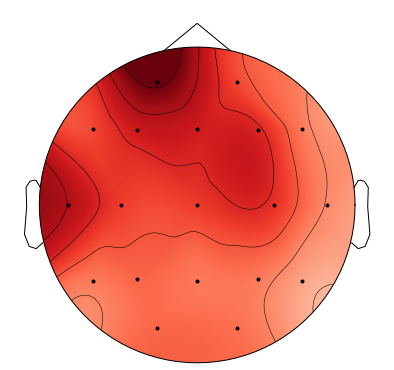

In [5]:
plot_topomap(deltadf)

### Plotting with Predefined plt.Axes
This is useful if you want to control the axis the plot is drawn on

<AxesSubplot:>

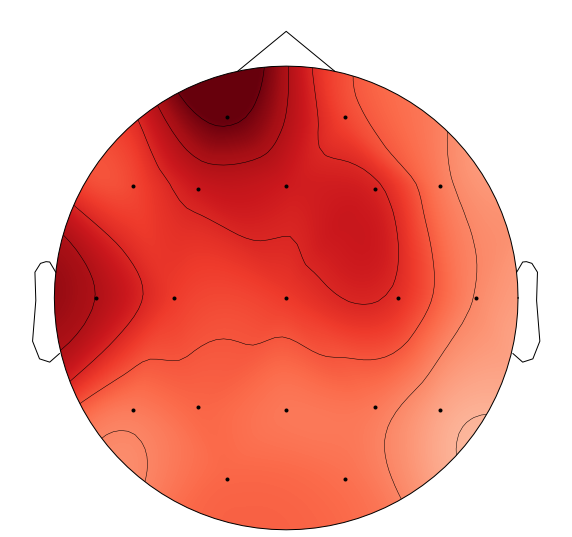

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
# Changes the background of the plot to white (Instead of transparent by default)
fig.patch.set_facecolor("white")
plot_topomap(deltadf, ax=ax)

### Show Additional Information
- Show names of the points
- Change the marker color and shape

<AxesSubplot:>

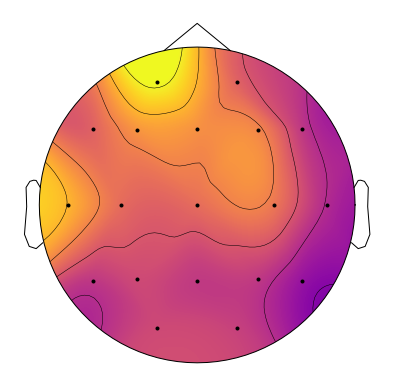

In [7]:
plot_topomap(deltadf, cmap="plasma")

### Plot Multiple in a Grid

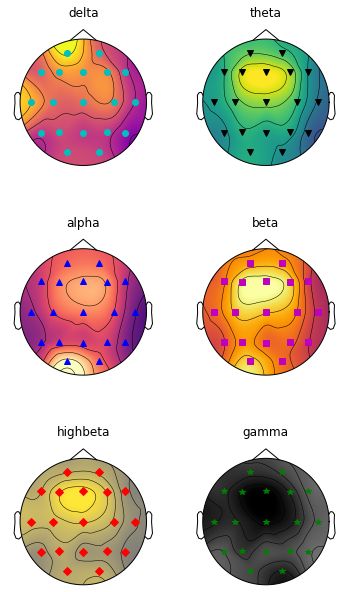

In [18]:
heatmaps_to_plot = [deltadf, thetadf, alphadf, betadf, highbetadf, gammadf]
# Changing the colors just for funzies. These are matplotlib colors
cmaps = ["plasma", "viridis", "magma", "inferno", "cividis", "Greys"]
# Change the marker icon for the hell of it. These are matplotlib marker formats
markers = ["co", "kv", "b^", "ms", "rD", "g*"]
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(6, 10), sharex=True, sharey=True)
fig.patch.set_facecolor("white")

for i, df in enumerate(heatmaps_to_plot):
    ax = axes.flat[i]
    band_name = df.columns[0].split(".")[2]
    ax.set_title(band_name)
    plot_topomap(df, ax=ax, cmap=cmaps[i], marker=markers[i])